---

**ALURA DESAFIO 2 - ANALISE DE DADOS VACINAÇÃO**

---


# **Introdução e Objetivo** 

Este projeto aborda a analise exploratória histórica da cobertura vacinal do Brasil, iniciando com a comparação dos gastos e cobertura com países vizinhos, utilizando dados da [OMS]( https://www.who.int/teams/immunization-vaccines-and-biologicals/data-statistics-and-graphics), seguindo para a analise de dados do [programa de imunização nacional](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def) com os dados focados na cobertura por estados do Brasil e após analise geral da cobertura, será abordada a cobertura por estado das vacinas que combatem o sarampo.  




Termos para melhor entendimento do projeto:

**Meta de vacinação**: Definido pelo ministério da saúde a meta e vacinar de 90 a 95% (de acordo com a vacina) dos indivíduos suscetíveis aquela doença.

**Surto da doença**: Número de casos confirmados maior do que a estimativa.


*De acordo com [relatório da OMS](https://www.who.int/news/item/12-11-2020-worldwide-measles-deaths-climb-50-from-2016-to-2019-claiming-over-207-500-lives-in-2019) (Organização Mundial da Saúde) o mundo enfrenta uma volta do sarampo, podemos observar no [mapa interativo](https://measlesrubellainitiative.org/learn/measles-rubella-map/) da organização [‘Iniciativa Sarampo e Rubeola’](https://measlesrubellainitiative.org/resources/outbreaks/)  (Entidade global que financia suporta países para lidar com surtos de sarampo e rubéola).

# **Metodologia**

##**Dicionário das bases de dados**


**raw_imunos_estados_ano**

Base de dados com a porcentagem do atingimento da meta de vacinação. Sendo o valor a media de todos os registros de vacinas aplicadas naquele periodo, naquele estado.

Index: Estados e Regiões do Brasil, Total: media de todos os valores validos para o ano

Fonte: Tabnet

Colunas: Periodo em anos 

**raw_imunos_ano**

Base de dados com a cobertura nacional de cada vacina por periodo (ano)

Index: Imuno (vacina), Total: media de todos os valores validos para o ano

Colunas: Periodo em anos

Fonte: Tabnet

**raw_sarampo_estados_ano**

Base de dados da cobertura das vacinas de sarampo e Triplice viral (primeira dose) por estado por periodo (ano)

Index: Estados do Brasil

Colunas:Periodo em anos

Fonte: Tabnet


**populacao**

Base de dados da população total dos paises Brasil, Argentina e Bolivia, durante os anos de 2006 a 2019

Index: Periodo em anos

Colunas: Paises

Fonte: WolrdOMeter

**gastos_pais**

Despesas dos paises em vacinação no periodo de 2006 a 20019

Index: Periodo em anos

Colunas: Paises

Fonte: OMS

**gastos_população_percapita_cobertura**

Base de dados gerada contendo:

Index: Periodo em anos

BR_população: População do Brasil durante o periodo.

AR_população: População da Argentina durante o periodo.

BO_população: População da Bolivia durante o periodo.

BR_gasto: Despesas com vacina do Brasil durante o periodo.

AR_gasto: Despesas com vacina da Argentina durante o periodo.

BO_gasto: Despesas com vacina da Bolivia durante o periodo.

BR_gasto_percapita: Gasto per capita em vacina do governo do Brasil durante o periodo.

AR_gasto_percapita: Gasto per capita em vacina do governo da Argentina durante o periodo.

BO_gasto_percapita: Gasto per capita em vacina do governo da Bolivia durante o periodo.

BR_cobertura: Cobertura vacinal no Brasil durante o periodo.

AR_cobertura: Cobertura vacinal na Argentina durante o periodo.

BO_cobertura: Cobertura vacinal na Bolivia durante o periodo.


In [1]:
# Importando as bibliotecas utilizadas no projeto
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
from io import StringIO

In [2]:
pd.options.display.float_format = "{:.2f}".format

##**Hipoteses da analise**

###**O Brasil nunca aingiu a meta de vacinação**

R: Dado questionavel, visto que pelo relatorio da OMS conseguimos atingir as metas historicamente porem diverge do relatorio PNI.

###**Quanto maior o investimento maior a cobertura da vacinação**

R: Sim, podemos ver que maiores gastos per capita, como no Brasil e Argentina, tendem a ter efeitos melhores do que pouco gasto, conforme visto na Bolivia. Porem o gasto não e proporcional, principalmente levando o historico em comparação, visto que nunca foi gasto tanto com a vacinação e nunca estivemos tão longe da meta.

###**O retono do Sarampo se da exclusivamente pela falta de vacinação**

R: Não exclusivamente, porem a vacinação previne a infecção da doença, com o mundo globalizado e possível que um estrangeiro contaminado infecte a população do pais que for visitar, logo a vacina funciona como um escudo a este infortúnio.

##**Comparação de despesas**



Neste bloco iniciaremos comparando os dados de despesa absoluta, per capita e cobertura vacinal do Brasil, Argentina e Bolivia entre os anos de 2006 e 20019.

As bases de [dados colhidas](https://www.who.int/immunization/monitoring_surveillance/data/administrative_coverage.xlsx) são fornecidas pela [OMS](https://www.who.int/teams/immunization-vaccines-and-biologicals/data-statistics-and-graphics), para as bases de população foram utilizados dados fornecidos pelo [WolrdOMeter](https://www.worldometers.info/world-population/).



In [3]:
#Importação da base populacional dos paises de acordo com os anos.
populacao_nettable = """
Ano	BR_população	AR_população	BO_população
2006	188167356	39289878	9395446
2007	190130443	39684295	9558439
2008	192030362	40080160	9721454
2009	193886508	40482788	9884781
2010	195713635	40895752	10048590
2011	197514536	41320500	10212954
2012	199287299	41755196	10377676
2013	201035912	42196030	10542377
2014	202763739	42637511	10706517
2015	204471769	43075416	10869730
2016	206163053	43508460	11031814
2017	207833823	43937140	11192855
2018	209469323	44361150	11353142
2019	211049527	44780677	11513100"""

populacao = StringIO(populacao_nettable)
populacao = pd.read_csv(populacao, sep="\t")
display(populacao.head())
populacao['Ano'] = populacao['Ano'].astype(str)
populacao[['BR_população','AR_população','BO_população']] = populacao[['BR_população','AR_população','BO_população']].astype(float)
populacao = populacao.set_index('Ano')

,Ano,BR_população,AR_população,BO_população
0,2006,188167356,39289878,9395446
1,2007,190130443,39684295,9558439
2,2008,192030362,40080160,9721454
3,2009,193886508,40482788,9884781
4,2010,195713635,40895752,10048590


In [4]:
#Importação da base de despesas com cobertura vacinal reportados a OMS
url4 = 'https://github.com/PDamaral/Projects/blob/main/Vacina%C3%A7%C3%A3o_ate_2019_BR/Gastos_cobertura_pais.xlsx?raw=true'
gastos_pais = pd.read_excel(url4, na_values=('...','-'), skiprows=2, )
gastos_pais = gastos_pais.drop(columns=['ISO Code','Region','income'])
gastos_pais = gastos_pais.set_index('Country')
gastos_pais = gastos_pais.transpose()
gastos_pais.head(2)

Country,Country,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bulgaria,Bahrain,Bahamas,Bosnia and Herzegovina,Belarus,Belize,Bolivia,Brazil,Barbados,Brunei Darussalam,Bhutan,Botswana,Central African Republic,Canada,Switzerland,Chile,China,Côte d'Ivoire,Cameroon,Democratic Republic of the Congo,Congo (The),Cook Islands,Colombia,...,Sierra Leone,El Salvador,San Marino,Somalia,Serbia,South Sudan,Sao Tome and Principe,Suriname,Slovakia,Slovenia,Sweden,Eswatini,Seychelles,Syria,Chad,Togo,Thailand,Tajikistan,Turkmenistan,Timor-Leste,Tonga,Trinidad and Tobago,Tunisia,Turkey,Tuvalu,Tanzania,Uganda,Ukraine,Uruguay,United States of America,Uzbekistan,Saint Vincent and The Grenadines,Venezuela,Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
2006,2006.00,nan,1260000.00,468750.00,nan,nan,33115865.00,90000.00,51000.00,nan,12556504.27,482758.00,23000.00,nan,601761.02,2172268.18,7888251.00,2885910.34,nan,820557.00,2321852.35,3278834.00,213171.91,4984510.00,nan,340000.00,nan,63345.62,nan,nan,nan,nan,21557974.00,nan,3235647.74,1221935.63,nan,500000.00,2383.63,37608034.26,...,nan,7249219.14,nan,nan,nan,nan,nan,83797.87,nan,5022601.71,nan,370552.41,nan,15874298.65,320000.00,218800.00,18557626.31,30000.00,738430.00,nan,54097.08,nan,2329075.88,nan,2000.00,5572841.00,2000000.00,34724257.43,3396774.00,nan,872953.47,nan,nan,3303392.40,45191.29,38000.00,1522462.41,nan,1332704.00,nan
2007,2007.00,nan,1790000.00,515625.00,nan,nan,33194285.70,156396.53,nan,436532507.74,13706140.35,1840748.16,78790.00,nan,531356.00,2488497.53,12843080.00,7697152.05,nan,820557.00,1049685.09,3763634.93,271408.00,6234709.00,433800503.11,340000.00,nan,11707.00,nan,50000.00,nan,nan,28000000.00,nan,3943664.94,1436151.00,nan,140000.00,20100.00,37272939.00,...,nan,6309618.17,nan,nan,nan,nan,17557.00,181818.18,nan,7264254.39,nan,276265.08,31250.00,26747500.72,842954.46,286320.60,25000000.00,144913.00,1764886.00,nan,42000.00,nan,2341189.32,nan,2000.00,3859230.00,2906977.00,38920128.71,3808663.68,nan,1026749.46,26783.92,nan,4710138.00,45191.29,30769.00,2500000.00,nan,1887950.00,nan


In [5]:
#Tratando a base para somente os paises de interesse.
gastos_pais = gastos_pais[['Argentina','Brazil','Bolivia']]
gastos_pais = gastos_pais.rename(columns={'Argentina':'AR_gasto','Brazil':'BR_gasto', 'Bolivia':'BO_gasto'}) 
gastos_pais.head(2)

Country,AR_gasto,BR_gasto,BO_gasto
2006,33115865.00,nan,4984510.00
2007,33194285.70,433800503.11,6234709.00


In [6]:
#Criando junção de dataset de despesas e populacional.
populacao = populacao.reset_index()
gastos_pais = gastos_pais.reset_index()
gastos_população = populacao.join(gastos_pais)
gastos_população = gastos_população.drop(columns='index')
gastos_população = gastos_população.set_index('Ano')
gastos_população = gastos_população.interpolate(method='linear').fillna(0)
gastos_população.head(2)

,BR_população,AR_população,BO_população,AR_gasto,BR_gasto,BO_gasto
Ano,,,,,,
2006,188167356.00,39289878.00,9395446.00,33115865.00,0.00,4984510.00
2007,190130443.00,39684295.00,9558439.00,33194285.70,433800503.11,6234709.00


In [7]:
#Criando colunas com gastos per capita dos paises
gastos_população_percapita = gastos_população
gastos_população_percapita['BR_gasto_percapita'] = gastos_população['BR_gasto'] / gastos_população['BR_população']
gastos_população_percapita['AR_gasto_percapita'] = gastos_população['AR_gasto'] / gastos_população['AR_população']
gastos_população_percapita['BO_gasto_percapita'] = gastos_população['BO_gasto'] / gastos_população['BO_população']
gastos_população_percapita

,BR_população,AR_população,BO_população,AR_gasto,BR_gasto,BO_gasto,BR_gasto_percapita,AR_gasto_percapita,BO_gasto_percapita
Ano,,,,,,,,,
2006,188167356.00,39289878.00,9395446.00,33115865.00,0.00,4984510.00,0.00,0.84,0.53
2007,190130443.00,39684295.00,9558439.00,33194285.70,433800503.11,6234709.00,2.28,0.84,0.65
2008,192030362.00,40080160.00,9721454.00,25286793.00,419146373.40,6492330.00,2.18,0.63,0.67
2009,193886508.00,40482788.00,9884781.00,46420558.46,404492243.69,8294595.09,2.09,1.15,0.84
2010,195713635.00,40895752.00,10048590.00,53853728.00,646275638.26,7514059.54,3.30,1.32,0.75
2011,197514536.00,41320500.00,10212954.00,181213432.00,554595723.98,6733524.00,2.81,4.39,0.66
2012,199287299.00,41755196.00,10377676.00,155137242.00,558682128.68,7322135.00,2.80,3.72,0.71
2013,201035912.00,42196030.00,10542377.00,111139854.00,562768533.39,8044503.33,2.80,2.63,0.76
2014,202763739.00,42637511.00,10706517.00,218837799.00,837536287.96,9618076.56,4.13,5.13,0.90


### Grafico das despesas per capita dos paises

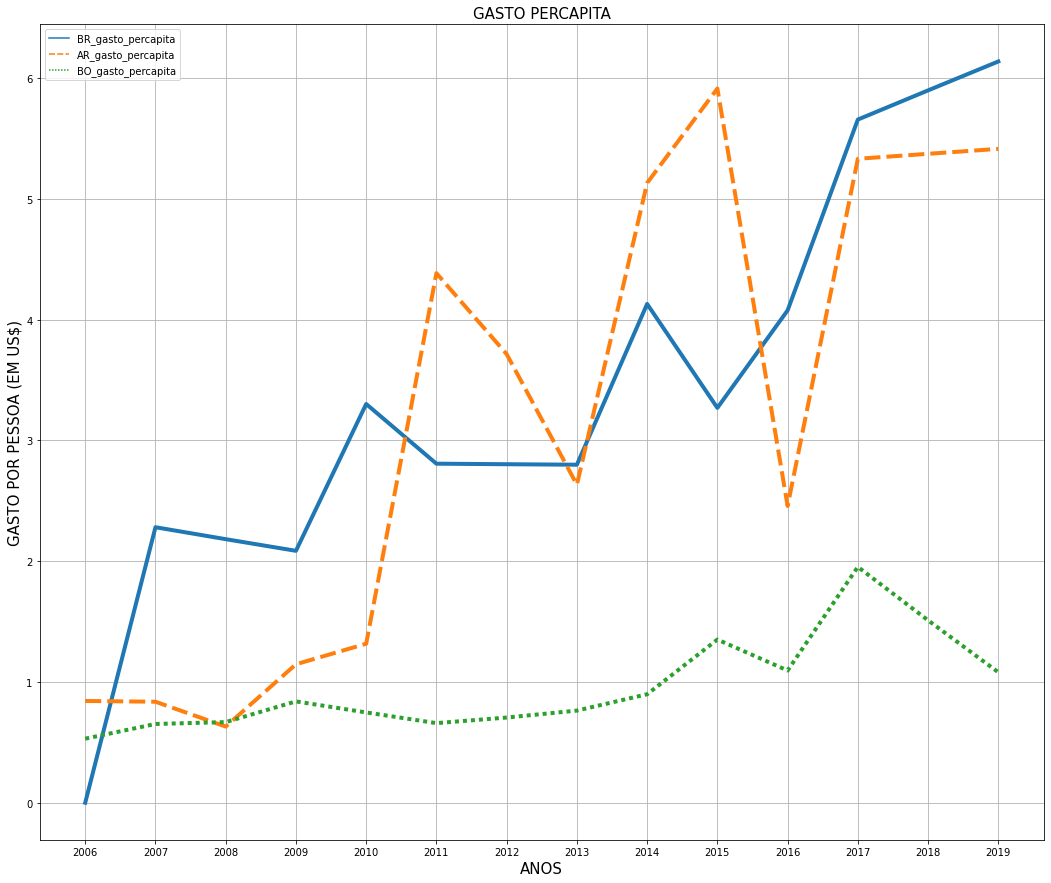

In [8]:
#Plotagem do gasto per capito de cada pais durante os anos.
plt.figure(figsize=(18, 15))
sns.lineplot(data=gastos_população_percapita[['BR_gasto_percapita','AR_gasto_percapita','BO_gasto_percapita']], markers= False, linewidth=4)

plt.title('GASTO PERCAPITA',fontsize=15)  
plt.xlabel('ANOS',fontsize=15)
plt.ylabel('GASTO POR PESSOA (EM US$)', fontsize=15)
plt.grid()

plt.show()

In [9]:
#Importação da base de dados para a cobertura de vacinas no Brasil
br_coverage_nettable = """
NamePublicationEnglish	Brazil													
														
Max of PerCentCoverage	Year													
VaccineCode	2006	2007	2008	2009	2010	2011	2012	2013	2014	2015	2016	2017	2018	2019
BCG	113	111	108	108	106	107	105	107	107	105	96	110	98	85
DiphCV4													77	57
DiphCV5													97	
DiphCV6														
DTP1	104	103	100	102	100	103	101	104	101	97	95	100	87	79
DTP3	104	104	99	102	99	100	95	97	93	96	89	89	87	70
DTP4									85	86	61	80		
HepB_BD			106	101				39	88	91	82		87	77
HepB_BDall											95	98	93	69
HepB3	100	100	96	100	96	98	96	101	96	96	89	93	93	72
Hib3	104	104	99	102	99	100	95	98	95	96	89	93	83	72
HPVfem													10	47
HPVmale													11	19
IPV1							106	100	97	102	83	114	88	86
IPV1frac														
IPV2frac														
JapEnc														
MCV1	105	107	100	104	100	102	99	107	112	96	95	97	92	91
MCV2				55		71	70	69	89	80	77	41	76	54
MenA													84	88
PAB														0
PAB_DTP1		98	98	92		34				43	105	32		
PCV1						100	97		99	103	95	106	87	87
PCV2							95		94	96	94	101	84	86
PCV3					24	82	88	94	93	94	84			
PerCV4													77	
Pol3	105	105	100	104	99	101	96	101	96	98	72	75	85	82
RCV1	105		100	104	100	102	99	107	112	96	95	97	92	91
Rota1			81	94	93	97	99		100	102	91	88	90	86
RotaC	47	80	81	86	83	87	86	93	92	94	88	70	80	83
TT2plus		98	31	89	31	56	54		96	43	61	39		58
TTCV4													77	
TTCV5													97	
TTCV6														
Typhoid														
VAD1	75												80	
YFV	100	108	103	109	105	107	108	112	102	99	43	55	58	60
Total	104	104	100	102	99	100	96	101	96	96	89	93	86	77"""

br_coverage = StringIO(br_coverage_nettable)
br_coverage = pd.read_csv(br_coverage, sep="\t", skiprows=4)
br_coverage = br_coverage.set_index('VaccineCode')
br_coverage = br_coverage.T
br_coverage.head(2)

VaccineCode,BCG,DiphCV4,DiphCV5,DiphCV6,DTP1,DTP3,DTP4,HepB_BD,HepB_BDall,HepB3,Hib3,HPVfem,HPVmale,IPV1,IPV1frac,IPV2frac,JapEnc,MCV1,MCV2,MenA,PAB,PAB_DTP1,PCV1,PCV2,PCV3,PerCV4,Pol3,RCV1,Rota1,RotaC,TT2plus,TTCV4,TTCV5,TTCV6,Typhoid,VAD1,YFV,Total
2006,113.00,nan,nan,nan,104.00,104.00,nan,nan,nan,100.00,104.00,nan,nan,nan,nan,nan,nan,105.00,nan,nan,nan,nan,nan,nan,nan,nan,105.00,105.00,nan,47.00,nan,nan,nan,nan,nan,75.00,100.00,104.00
2007,111.00,nan,nan,nan,103.00,104.00,nan,nan,nan,100.00,104.00,nan,nan,nan,nan,nan,nan,107.00,nan,nan,nan,98.00,nan,nan,nan,nan,105.00,nan,nan,80.00,98.00,nan,nan,nan,nan,nan,108.00,104.00


In [10]:
#Importação da base de dados para a cobertura de vacinas na Argentina
ar_coverage_nettable = """
NamePublicationEnglish	Argentina													
														
Max of PerCentCoverage	Year													
VaccineCode	2006	2007	2008	2009	2010	2011	2012	2013	2014	2015	2016	2017	2018	2019
BCG	100	102	104	102	103	107	104	101	101	101	92	97	93	85
DiphCV4													80	73
DiphCV5													103	85
DiphCV6														
DTP1	93	94	97	94	95	94	94	94	98	94	88	94	91	87
DTP3	91	91	93	94	94	91	91	94	94	94	92	88	86	83
DTP4									84	74	79	74		
HepB_BD	72	76	79	81	79	85	88	85	87	84	81	82	82	77
HepB_BDall											81	82	82	77
HepB3	84	85	90	94	94	91	91	94	94	94	92	86	86	83
Hib3	91	91	93	94	94	91	91	94	94	94	92	86	86	83
HPVfem													58	59
HPVmale													4	48
IPV1											56	91	90	85
IPV1frac														
IPV2frac														
JapEnc														
MCV1	97	94	97	103	105	95	94	94	95	89	90	90	94	86
MCV2	91	84	88	97	94	91	89	83	96	87	88	91	101	84
MenA														
PAB														
PAB_DTP1														
PCV1							69	98	99	92	88	88	92	87
PCV2							48	90	93	87	84	83	88	84
PCV3							41	86	89	82	82	78	88	80
PerCV4													80	73
Pol3	92	92	94	97	95	93	90	90	92	93	87	85	84	83
RCV1			97	102	105	95	94	94	95	89	90	90	94	86
Rota1										83	85	87	88	83
RotaC										61	75	88	80	77
TT2plus	42					42	78	28		62	65	72	69	85
TTCV4													80	73
TTCV5													103	85
TTCV6														
Typhoid														
VAD1														
YFV				89	87	93	89	91	51	60	72	74	79	89
Total	91	91	93	94	94	92	90	94	94	88	86	87	86	83"""

ar_coverage = StringIO(ar_coverage_nettable)
ar_coverage = pd.read_csv(ar_coverage, sep="\t", skiprows=4)
ar_coverage = ar_coverage.set_index('VaccineCode')
ar_coverage = ar_coverage.T
ar_coverage.head(2)

VaccineCode,BCG,DiphCV4,DiphCV5,DiphCV6,DTP1,DTP3,DTP4,HepB_BD,HepB_BDall,HepB3,Hib3,HPVfem,HPVmale,IPV1,IPV1frac,IPV2frac,JapEnc,MCV1,MCV2,MenA,PAB,PAB_DTP1,PCV1,PCV2,PCV3,PerCV4,Pol3,RCV1,Rota1,RotaC,TT2plus,TTCV4,TTCV5,TTCV6,Typhoid,VAD1,YFV,Total
2006,100.00,nan,nan,nan,93.00,91.00,nan,72.00,nan,84.00,91.00,nan,nan,nan,nan,nan,nan,97.00,91.00,nan,nan,nan,nan,nan,nan,nan,92.00,nan,nan,nan,42.00,nan,nan,nan,nan,nan,nan,91.00
2007,102.00,nan,nan,nan,94.00,91.00,nan,76.00,nan,85.00,91.00,nan,nan,nan,nan,nan,nan,94.00,84.00,nan,nan,nan,nan,nan,nan,nan,92.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,91.00


In [11]:
#Importação da base de dados para a cobertura de vacinas na Bolivia
bo_coverage_nettable = """
NamePublicationEnglish	Bolivia													
														
Max of PerCentCoverage	Year													
VaccineCode	2006	2007	2008	2009	2010	2011	2012	2013	2014	2015	2016	2017	2018	2019
BCG	87	86	85	88	90	90	87	88	96	99	96	93	90	80
DiphCV4													61	60
DiphCV5													55	58
DiphCV6														
DTP1	87	85	87	87	87	89	85	87	94	97	93	91	89	81
DTP3	83	82	83	85	80	82	80	81	85	89	87	84	83	75
DTP4									28	58	60	60		
HepB_BD														
HepB_BDall														
HepB3	83	82	83	85	80	82	80	81	85	89		84	83	75
Hib3	83	82	83	85	80	82	80	81	85	89		84	83	75
HPVfem													54	31
HPVmale														
IPV1											93	91	89	81
IPV1frac														
IPV2frac														
JapEnc														
MCV1	82	83	86	86	79	84	84	83	86	95	94	83	89	79
MCV2											48		38	44
MenA														
PAB														
PAB_DTP1								45	87					
PCV1								5	115	96	93	91	86	81
PCV2									84	90	90	86	87	78
PCV3									56	86	87	83	83	75
PerCV4													21	60
Pol3	88	82	82	84	80	82	79	81	85	88	87	83	83	75
RCV1			86	86	79	84	84	83	86	95	94	83	89	79
Rota1			95	80	83	85	80	82	90	93	90	88	88	81
RotaC			40	65	76	80	76	78	85	89	87	84	87	78
TT2plus	13	12	59	51	76	27	26			74	108	83	83	
TTCV4													21	60
TTCV5													54	58
TTCV6														
Typhoid														
VAD1	49	48	51	46	48	49	47	55	57	61	49	57	77	58
YFV	76	82	77	61	63	81	82	81	73	88	89	82	84	77
Total	83	82	83	85	80	82	80	81	85	89	90	84	83	75"""

bo_coverage = StringIO(bo_coverage_nettable)
bo_coverage = pd.read_csv(bo_coverage, sep="\t", skiprows=4)
bo_coverage = bo_coverage.set_index('VaccineCode')
bo_coverage = bo_coverage.T
bo_coverage.head(2)

VaccineCode,BCG,DiphCV4,DiphCV5,DiphCV6,DTP1,DTP3,DTP4,HepB_BD,HepB_BDall,HepB3,Hib3,HPVfem,HPVmale,IPV1,IPV1frac,IPV2frac,JapEnc,MCV1,MCV2,MenA,PAB,PAB_DTP1,PCV1,PCV2,PCV3,PerCV4,Pol3,RCV1,Rota1,RotaC,TT2plus,TTCV4,TTCV5,TTCV6,Typhoid,VAD1,YFV,Total
2006,87.00,nan,nan,nan,87.00,83.00,nan,nan,nan,83.00,83.00,nan,nan,nan,nan,nan,nan,82.00,nan,nan,nan,nan,nan,nan,nan,nan,88.00,nan,nan,nan,13.00,nan,nan,nan,nan,49.00,76.00,83.00
2007,86.00,nan,nan,nan,85.00,82.00,nan,nan,nan,82.00,82.00,nan,nan,nan,nan,nan,nan,83.00,nan,nan,nan,nan,nan,nan,nan,nan,82.00,nan,nan,nan,12.00,nan,nan,nan,nan,48.00,82.00,82.00


In [12]:
#Criando dataset com população, despesa, despesa per capita e cobertura vacinal por pais
gastos_população_percapita_cobertura = gastos_população_percapita
gastos_população_percapita['BR_cobertura'] = br_coverage['Total']
gastos_população_percapita['AR_cobertura'] = ar_coverage['Total']
gastos_população_percapita['BO_cobertura'] = bo_coverage['Total']
gastos_população_percapita_cobertura

,BR_população,AR_população,BO_população,AR_gasto,BR_gasto,BO_gasto,BR_gasto_percapita,AR_gasto_percapita,BO_gasto_percapita,BR_cobertura,AR_cobertura,BO_cobertura
Ano,,,,,,,,,,,,
2006,188167356.00,39289878.00,9395446.00,33115865.00,0.00,4984510.00,0.00,0.84,0.53,104.00,91.00,83.00
2007,190130443.00,39684295.00,9558439.00,33194285.70,433800503.11,6234709.00,2.28,0.84,0.65,104.00,91.00,82.00
2008,192030362.00,40080160.00,9721454.00,25286793.00,419146373.40,6492330.00,2.18,0.63,0.67,100.00,93.00,83.00
2009,193886508.00,40482788.00,9884781.00,46420558.46,404492243.69,8294595.09,2.09,1.15,0.84,102.00,94.00,85.00
2010,195713635.00,40895752.00,10048590.00,53853728.00,646275638.26,7514059.54,3.30,1.32,0.75,99.00,94.00,80.00
2011,197514536.00,41320500.00,10212954.00,181213432.00,554595723.98,6733524.00,2.81,4.39,0.66,100.00,92.00,82.00
2012,199287299.00,41755196.00,10377676.00,155137242.00,558682128.68,7322135.00,2.80,3.72,0.71,96.00,90.00,80.00
2013,201035912.00,42196030.00,10542377.00,111139854.00,562768533.39,8044503.33,2.80,2.63,0.76,101.00,94.00,81.00
2014,202763739.00,42637511.00,10706517.00,218837799.00,837536287.96,9618076.56,4.13,5.13,0.90,96.00,94.00,85.00


### Grafico da cobertura vacinal dos paises

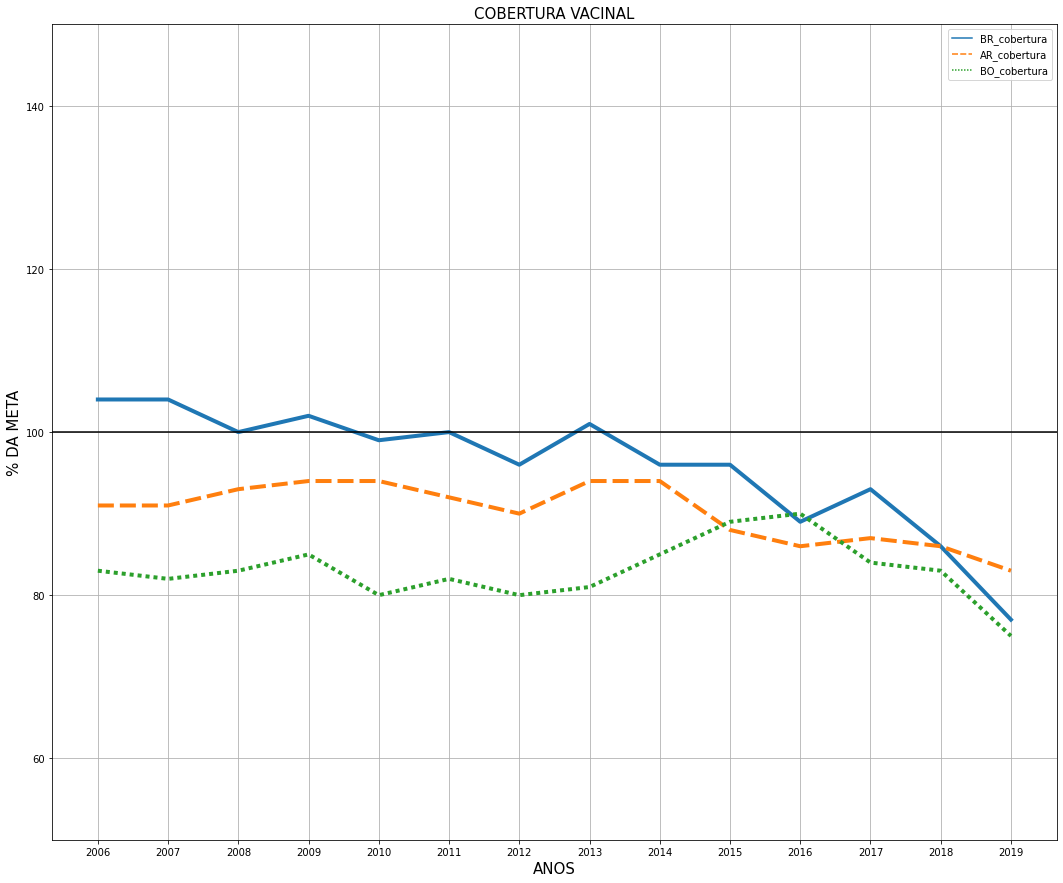

In [13]:
#Plotagem da cobertura de vacinação por pais
plt.figure(figsize=(18, 15))
sns.lineplot(data=gastos_população_percapita_cobertura[['BR_cobertura','AR_cobertura','BO_cobertura']], markers= False, linewidth=4)

plt.title('COBERTURA VACINAL',fontsize=15)  
plt.xlabel('ANOS',fontsize=15)
plt.ylabel('% DA META', fontsize=15)
plt.grid()
plt.axhline(y=100.0, color="black", linestyle="-")
plt.ylim(50,150)

plt.show()

### Plotagem comparativa dos paises com gastos

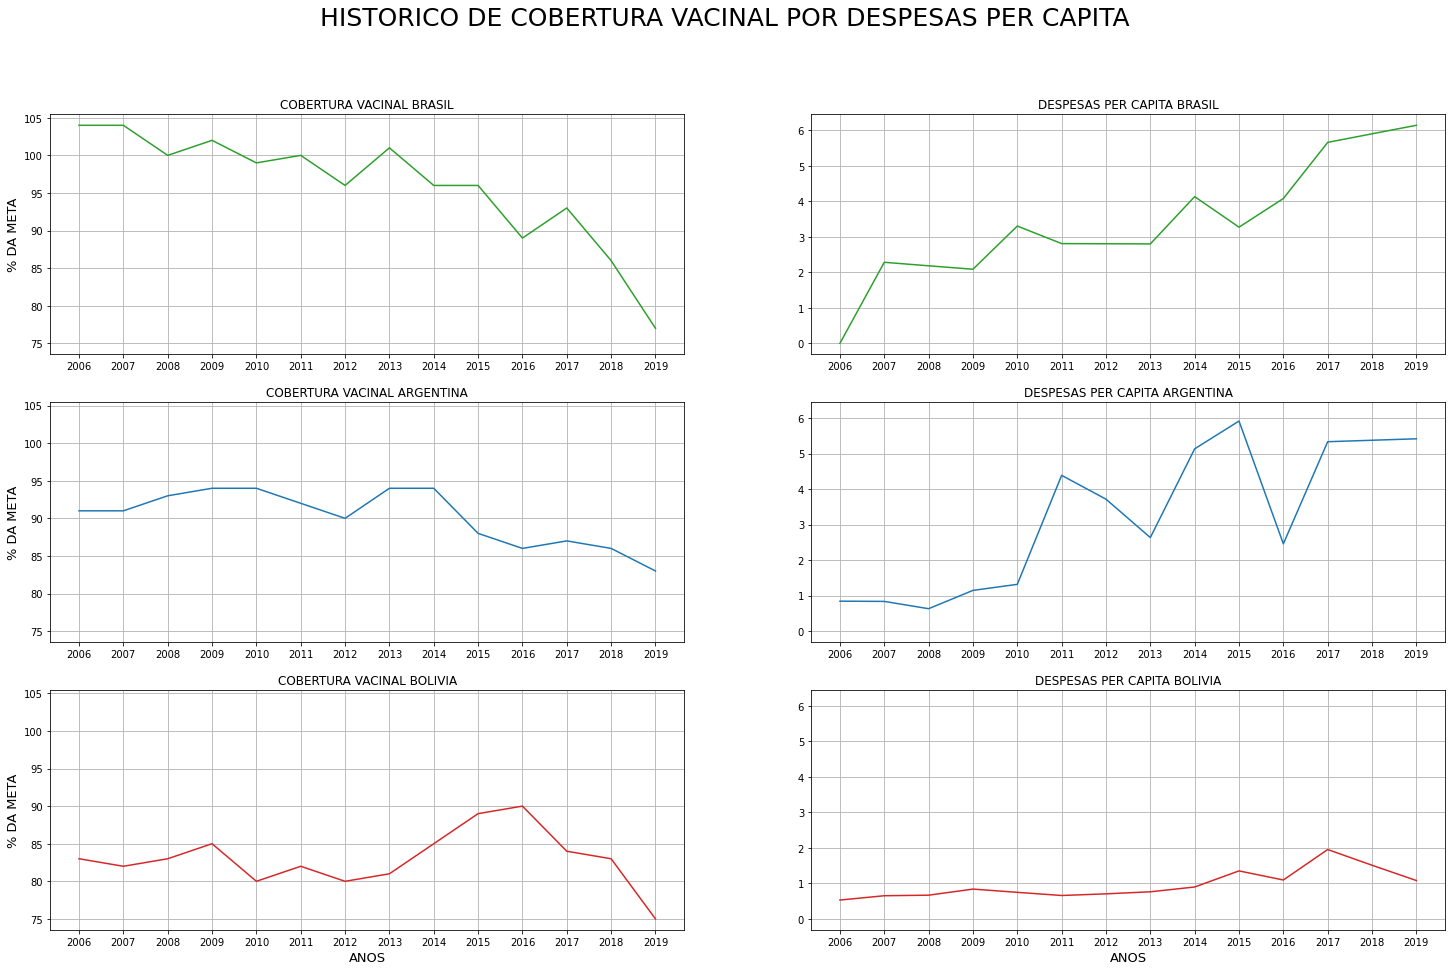

In [14]:
#Plotagem do grafico por estado da cobertura vacinal ao Sarampo
fig, axs = plt.subplots(3, 2,figsize=(25,15),sharey='col',linewidth='4')

axs[0, 0].plot(gastos_população_percapita_cobertura.index, gastos_população_percapita_cobertura['BR_cobertura'], 'tab:green')
axs[0, 0].set_title('COBERTURA VACINAL BRASIL',fontsize=12)
axs[0, 0].set_ylabel('% DA META',fontsize=13)
axs[0, 0].grid(which='both')

axs[0, 1].plot(gastos_população_percapita_cobertura.index, gastos_população_percapita_cobertura['BR_gasto_percapita'], 'tab:green')
axs[0, 1].set_title('DESPESAS PER CAPITA BRASIL',fontsize=12)
axs[0, 1].grid(which='both')

axs[1, 0].plot(gastos_população_percapita_cobertura.index, gastos_população_percapita_cobertura['AR_cobertura'], 'tab:blue')
axs[1, 0].set_title('COBERTURA VACINAL ARGENTINA',fontsize=12)
axs[1, 0].grid(which='both')
axs[1, 0].set_ylabel('% DA META',fontsize=13)

axs[1, 1].plot(gastos_população_percapita_cobertura.index, gastos_população_percapita_cobertura['AR_gasto_percapita'], 'tab:blue')
axs[1, 1].set_title('DESPESAS PER CAPITA ARGENTINA',fontsize=12)
axs[1, 1].grid(which='both')

axs[2, 1].plot(gastos_população_percapita_cobertura.index, gastos_população_percapita_cobertura['BO_gasto_percapita'], 'tab:red')
axs[2, 1].set_title('DESPESAS PER CAPITA BOLIVIA',fontsize=12)
axs[2, 1].grid(which='both')
axs[2, 1].set_xlabel('ANOS',fontsize=13)


axs[2, 0].plot(gastos_população_percapita_cobertura.index, gastos_população_percapita_cobertura['BO_cobertura'], 'tab:red')
axs[2, 0].set_title('COBERTURA VACINAL BOLIVIA',fontsize=12)
axs[2, 0].grid(which='both')
axs[2, 0].set_ylabel('% DA META',fontsize=13)
axs[2, 0].set_xlabel('ANOS',fontsize=13)

plt.suptitle('HISTORICO DE COBERTURA VACINAL POR DESPESAS PER CAPITA', fontsize=25)

plt.show()

Observamos a tendencia nos três países, que mesmo aumentando as despesas a cobertura vacinal diminuiu.
Nota-se que o Brasil mantem uma boa cobertura vacinal em todos os anos antes de 2017, onde as despesas se mantem próximas porem a cobertura teve uma queda considerável, o mesmo acontece com a Argentina, porem a queda da cobertura se da em uma taxa muito menor, na Bolívia o investimento varia pouco ao longo dos anos, o que em comparação afeta diretamente sua taxa de cobertura.


##**Analise vacinal no Brasil**

In [15]:
# Importando base raw_imunos_estados_ano
url0 = 'https://raw.githubusercontent.com/PDamaral/Projects/main/Vacina%C3%A7%C3%A3o_ate_2019_BR/imunos_estado_ano.csv'
raw_imunos_estados_ano = pd.read_csv(url0,encoding= 'ISO-8859-1', skiprows = 3, sep=';', skipfooter = 19, na_values=('...','-'),index_col='Região/Unidade da Federação', decimal=',')
raw_imunos_estados_ano.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
Região/Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,
Região Norte,31.03,41.67,55.20,68.57,73.28,81.34,75.81,80.97,78.91,75.09,86.68,82.36,81.57,83.97,80.79,82.19,78.08,83.91,78.21,68.12,76.25,83.05,48.22,64.34,66.24,44.55,73.56
.. Rondônia,42.76,50.80,76.05,83.33,93.26,82.31,79.59,83.70,78.18,72.30,81.87,80.75,84.44,86.21,82.39,83.87,79.26,92.75,85.82,76.72,98.18,111.27,63.77,80.74,82.45,51.44,79.88


In [16]:
# Tratando a base, retirando os anos 1994,1995 e 1996 e o total
# Retirando a contrabilização por região
imunos_estados_ano = raw_imunos_estados_ano.drop(columns=['1994','1995','1996','Total'])
imunos_estados_ano = imunos_estados_ano.drop(['Região Nordeste','Região Sudeste','Região Norte','Região Sul', 'Região Centro-Oeste'],axis= 0)
imunos_estados_ano.head(2)

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Região/Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,
.. Rondônia,83.33,93.26,82.31,79.59,83.70,78.18,72.30,81.87,80.75,84.44,86.21,82.39,83.87,79.26,92.75,85.82,76.72,98.18,111.27,63.77,80.74,82.45,51.44
.. Acre,67.56,66.38,85.61,66.79,76.77,81.66,77.54,80.21,72.09,70.66,80.54,75.04,79.18,76.32,84.74,74.35,58.87,59.29,75.54,46.91,62.18,67.44,45.44


###Grafico e analise do historico de cobertura vacinal por estado

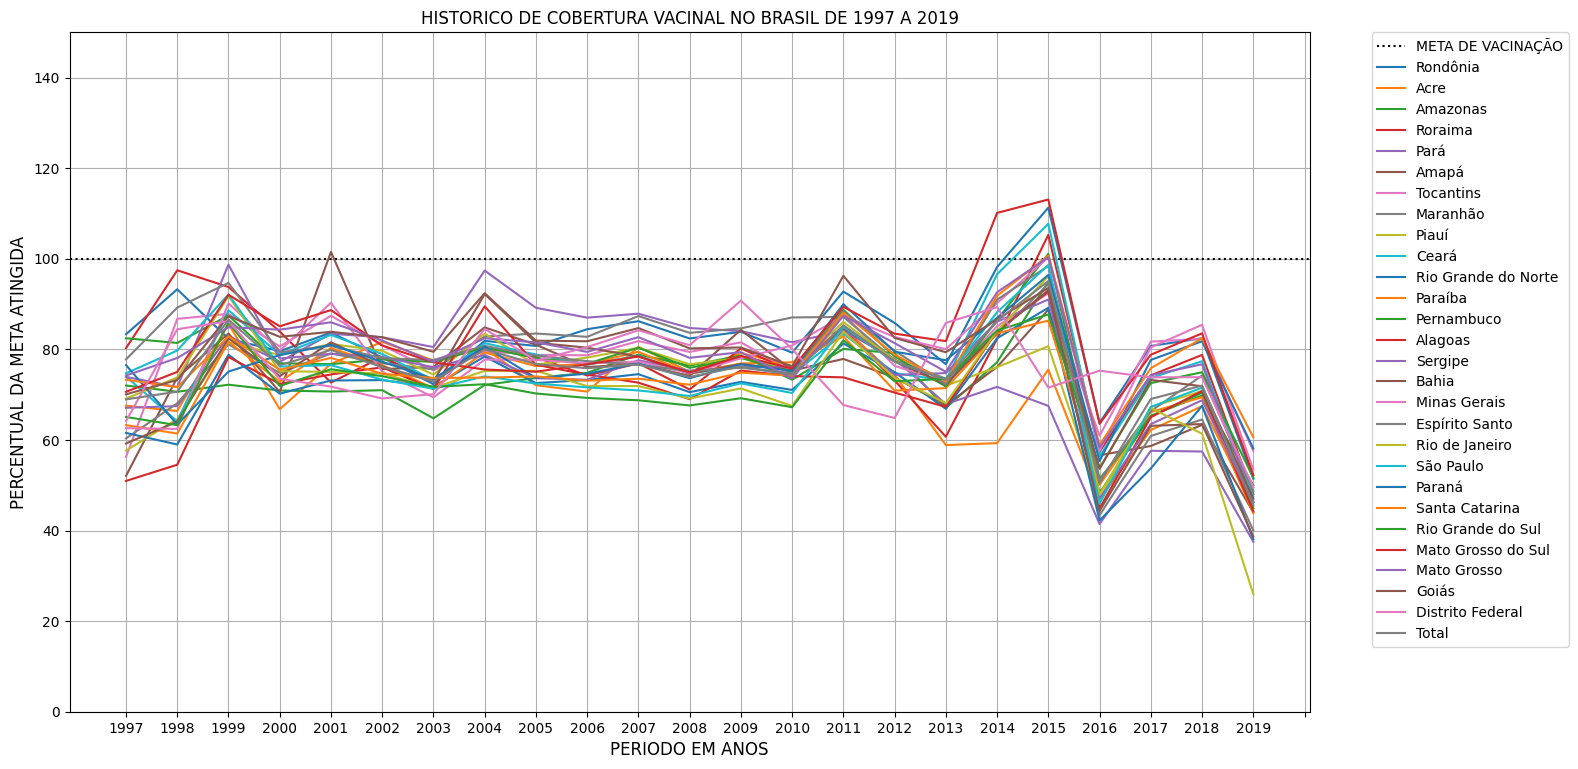

In [17]:
# Plotando grafico da cobertura por estado
%matplotlib inline

plt.figure(figsize=(16,9), dpi=100)

plt.xticks(ticks=np.arange(0,50), fontsize=10)


plt.title('HISTORICO DE COBERTURA VACINAL NO BRASIL DE 1997 A 2019')  
plt.xlabel('PERIODO EM ANOS',fontsize=12)
plt.ylabel('PERCENTUAL DA META ATINGIDA', fontsize=12)
plt.grid()
plt.axhline(y=100.0, color="black", linestyle=":")
plt.ylim(0,150)

plt.plot(imunos_estados_ano.T)

plt.legend(['META DE VACINAÇÃO','Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará',
       'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará',
       'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas',
       'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo',
       'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina',
       'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso',
       'Goiás', 'Distrito Federal','Total'],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

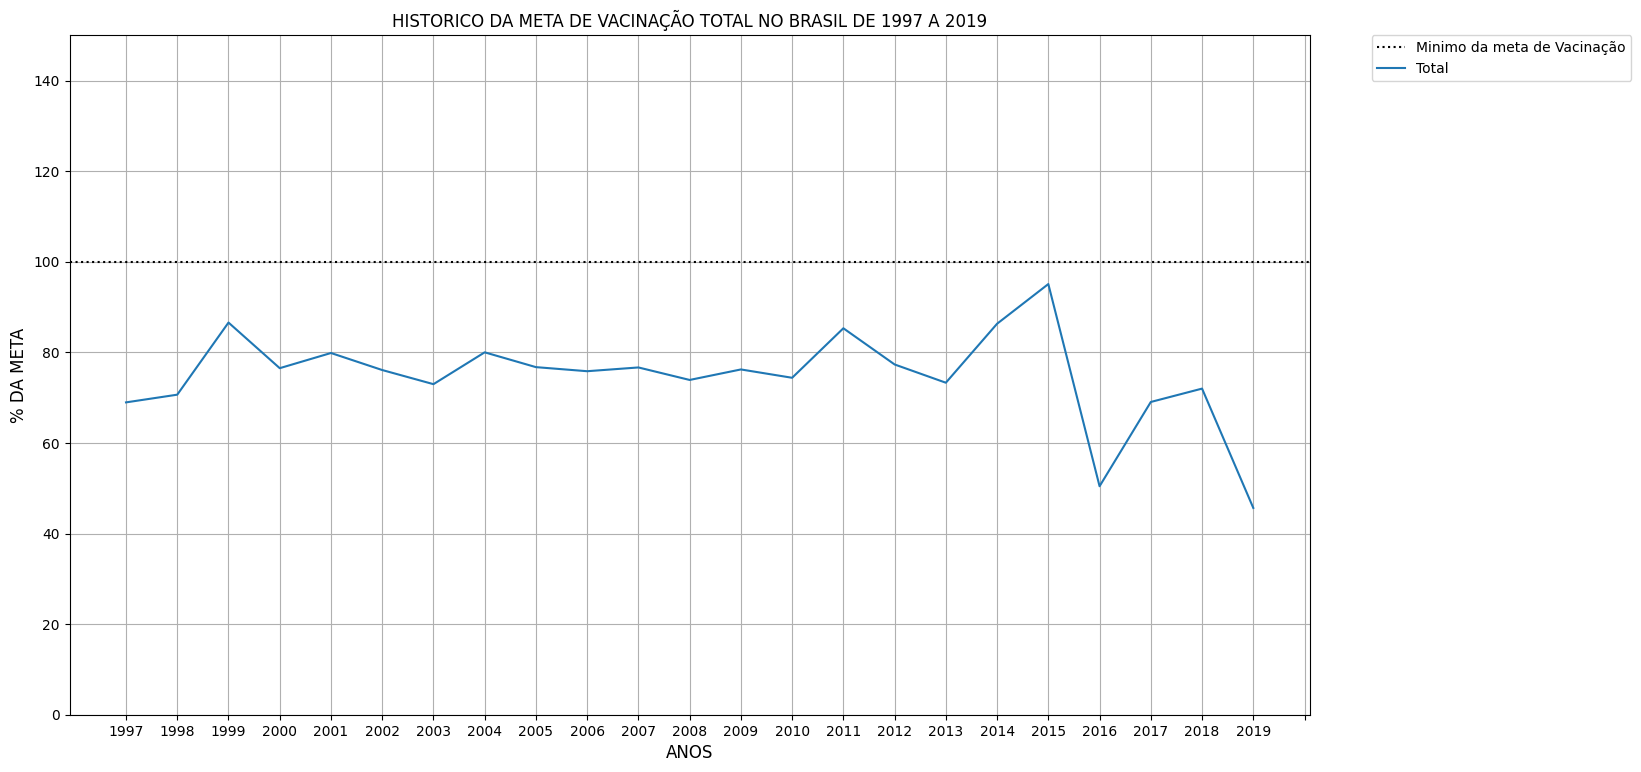

In [18]:
#Plogem do grafico somente para as vacinas de Sarampo e Triplice viral 
%matplotlib inline

plt.figure(figsize=(16,9), dpi=100)

plt.xticks(ticks=np.arange(0,50), fontsize=10)


plt.title('HISTORICO DA META DE VACINAÇÃO TOTAL NO BRASIL DE 1997 A 2019')  
plt.xlabel('ANOS',fontsize=12)
plt.ylabel('% DA META', fontsize=12)
plt.grid()
plt.axhline(y=100.0, color="black", linestyle=":")
plt.ylim(0,150)

plt.plot(imunos_estados_ano.T['Total'])

plt.legend(['Minimo da meta de Vacinação','Total'],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

De acordo com os dados Programa nacional de Imunização  poucas vezes em poucos estados conseguimos atingir a meta de vacinação completa. E como um todo nunca alcançamos a meta.


###Grafico e analise do historico de cobertura vacinal por Imuno

In [19]:
# Importando base raw_imunos_ano
# Tratando a base, retirando a coluna Total
url1 = 'https://raw.githubusercontent.com/PDamaral/Projects/main/Vacina%C3%A7%C3%A3o_ate_2019_BR/imunos_ano.csv'
raw_imunos_ano = pd.read_csv(url1,encoding= 'ISO-8859-1', skiprows = 3, sep=';', skipfooter = 19, na_values=('...','-',),index_col='Imuno',decimal=',')
raw_imunos_ano = raw_imunos_ano.drop(columns=['Total'])
raw_imunos_ano

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Imuno,,,,,,,,,,,,,,,,,,,,,,,,,,
072 BCG,88.29,103.62,104.19,117.12,111.61,117.28,111.74,112.60,110.28,108.47,113.36,114.48,113.06,111.08,108.91,108.71,106.71,107.94,105.69,107.42,107.28,105.08,95.55,97.12,97.72,52.95
099 Hepatite B em crianças até 30 dias,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,88.54,90.93,81.75,85.20,86.73,48.33
061 Rotavírus Humano,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,46.52,79.79,81.18,85.99,83.04,87.06,86.37,93.52,93.44,95.35,88.98,84.65,89.76,52.47
053 Meningococo C,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,26.88,105.66,96.18,99.70,96.36,98.19,91.68,87.04,87.50,53.66
073 Hepatite B,8.85,10.50,16.50,5.79,12.63,83.50,91.08,91.88,91.47,92.00,96.26,98.46,100.30,99.89,96.06,100.20,96.08,97.71,96.67,100.56,96.42,97.74,105.19,86.29,92.91,55.93
080 Penta,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,24.89,95.89,94.85,96.30,89.27,83.78,87.10,49.73
012 Pneumocócica,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,24.02,81.65,88.39,93.57,93.45,94.23,95.00,91.56,93.43,54.43
074 Poliomielite,58.23,77.82,80.85,89.27,95.30,99.08,101.44,102.83,100.01,100.48,104.30,105.12,105.25,105.43,100.18,103.66,99.35,101.33,96.55,100.71,96.76,98.29,84.43,84.27,88.17,51.54
100 Poliomielite 4 anos,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.62,0.47,0.19


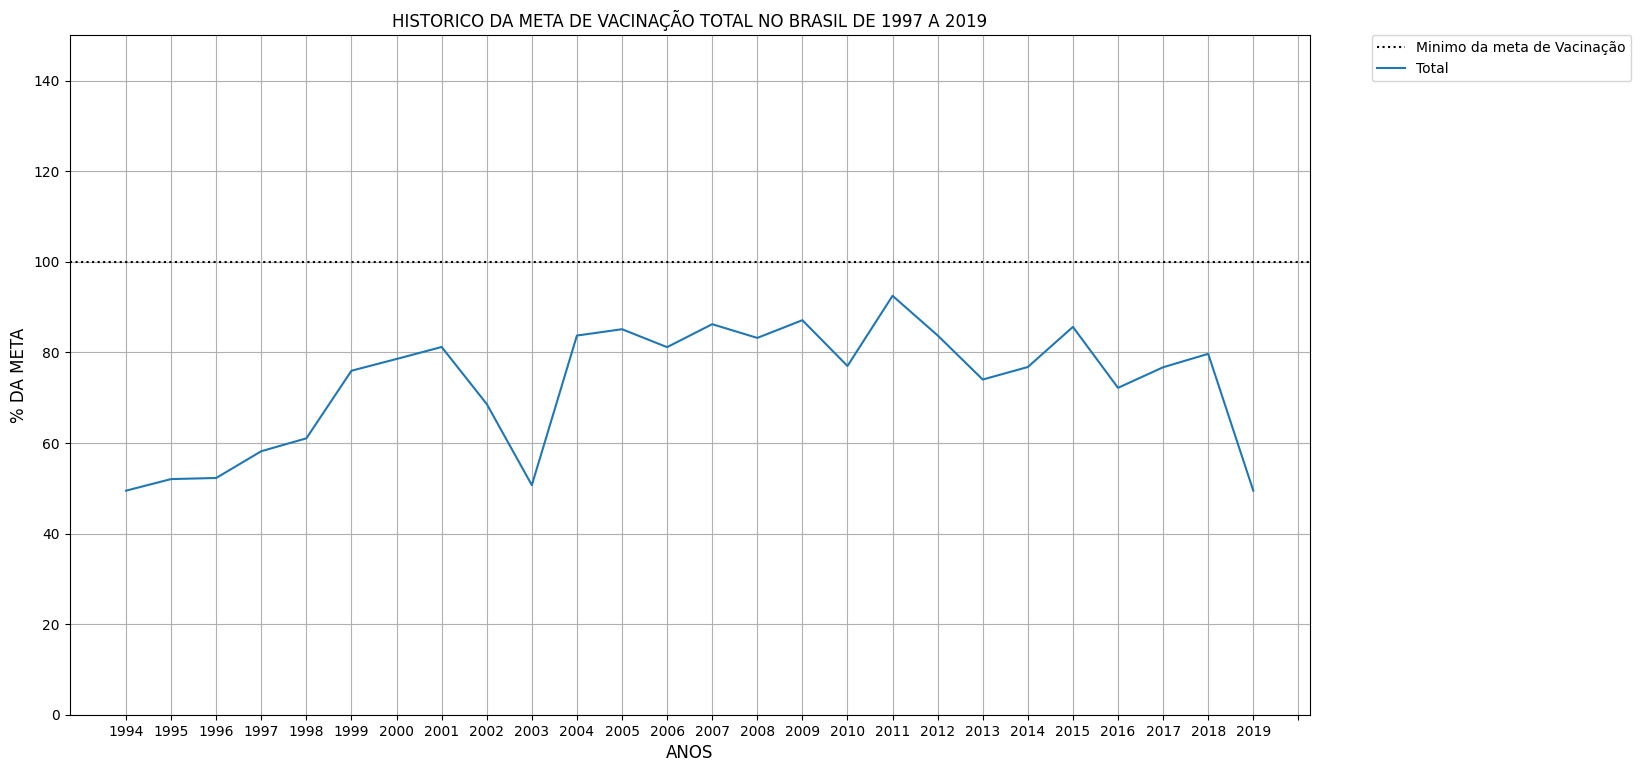

In [20]:
#Plogem do grafico somente para as vacinas de Sarampo e Triplice viral 
%matplotlib inline

plt.figure(figsize=(16,9), dpi=100)

plt.xticks(ticks=np.arange(0,50), fontsize=10)


plt.title('HISTORICO DA META DE VACINAÇÃO TOTAL NO BRASIL DE 1997 A 2019')  
plt.xlabel('ANOS',fontsize=12)
plt.ylabel('% DA META', fontsize=12)
plt.grid()
plt.axhline(y=100.0, color="black", linestyle=":")
plt.ylim(0,150)

plt.plot(raw_imunos_ano.T['Total'])

plt.legend(['Minimo da meta de Vacinação','Total'],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

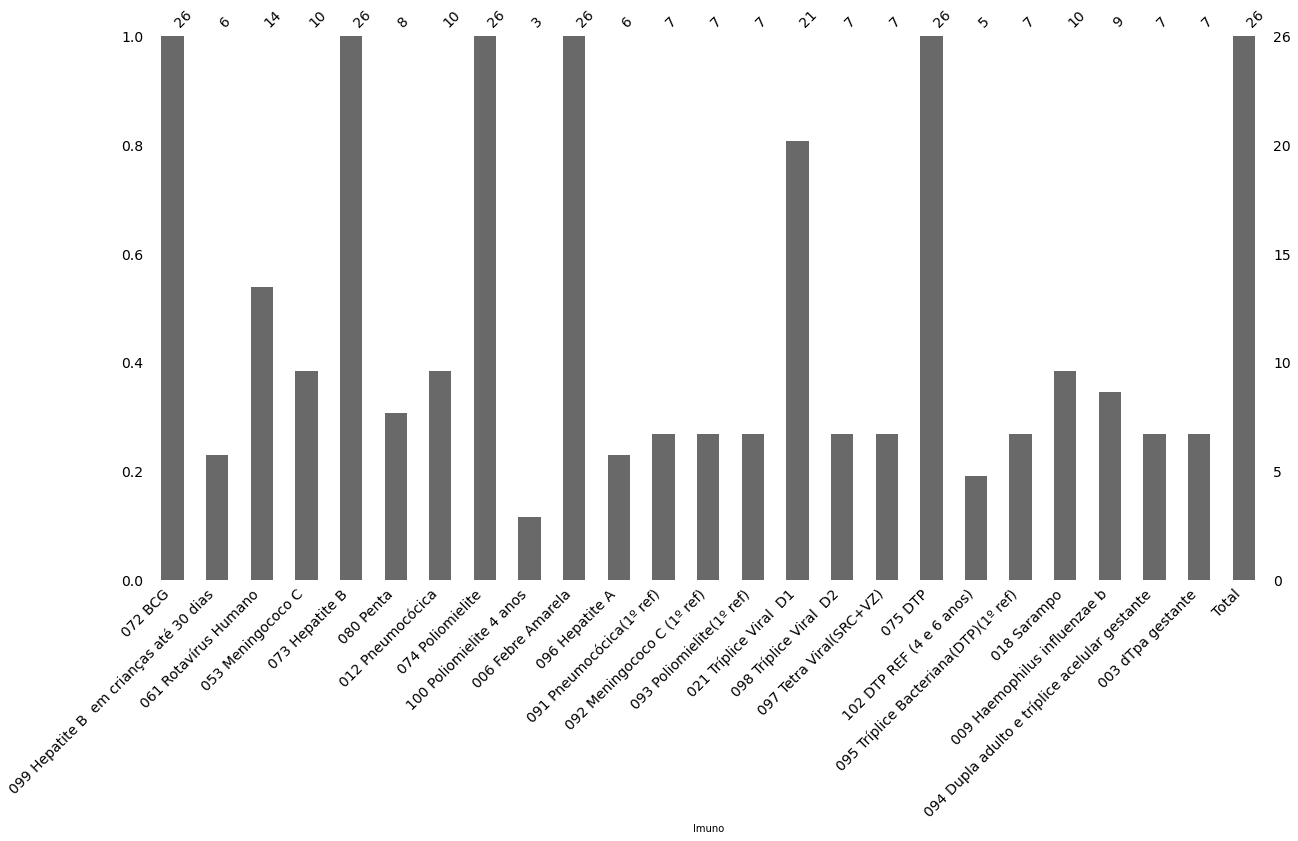

In [21]:
# Analise de dados faltantes
%matplotlib inline
msno.bar(raw_imunos_ano.T,figsize=(20,10),fontsize=14)
plt.show()

Podemos observar que a base de dados possui muitos valores faltantes para diversas vacinas, possivelmente devido ao não treinamento/ tempo habil a tarefa dos agentes , isso gera resultados tendenciosos para o gráfico, o preenchimento com maior precisão quanto aos fatos deste histórico demanda um trabalho especifico e complexo, que não será abordado neste projeto.


##**Casos de Sarampo**

Analisando de maneira mais granular, podemos ver a tendencia das vacinas de Sarampo no Brasil.

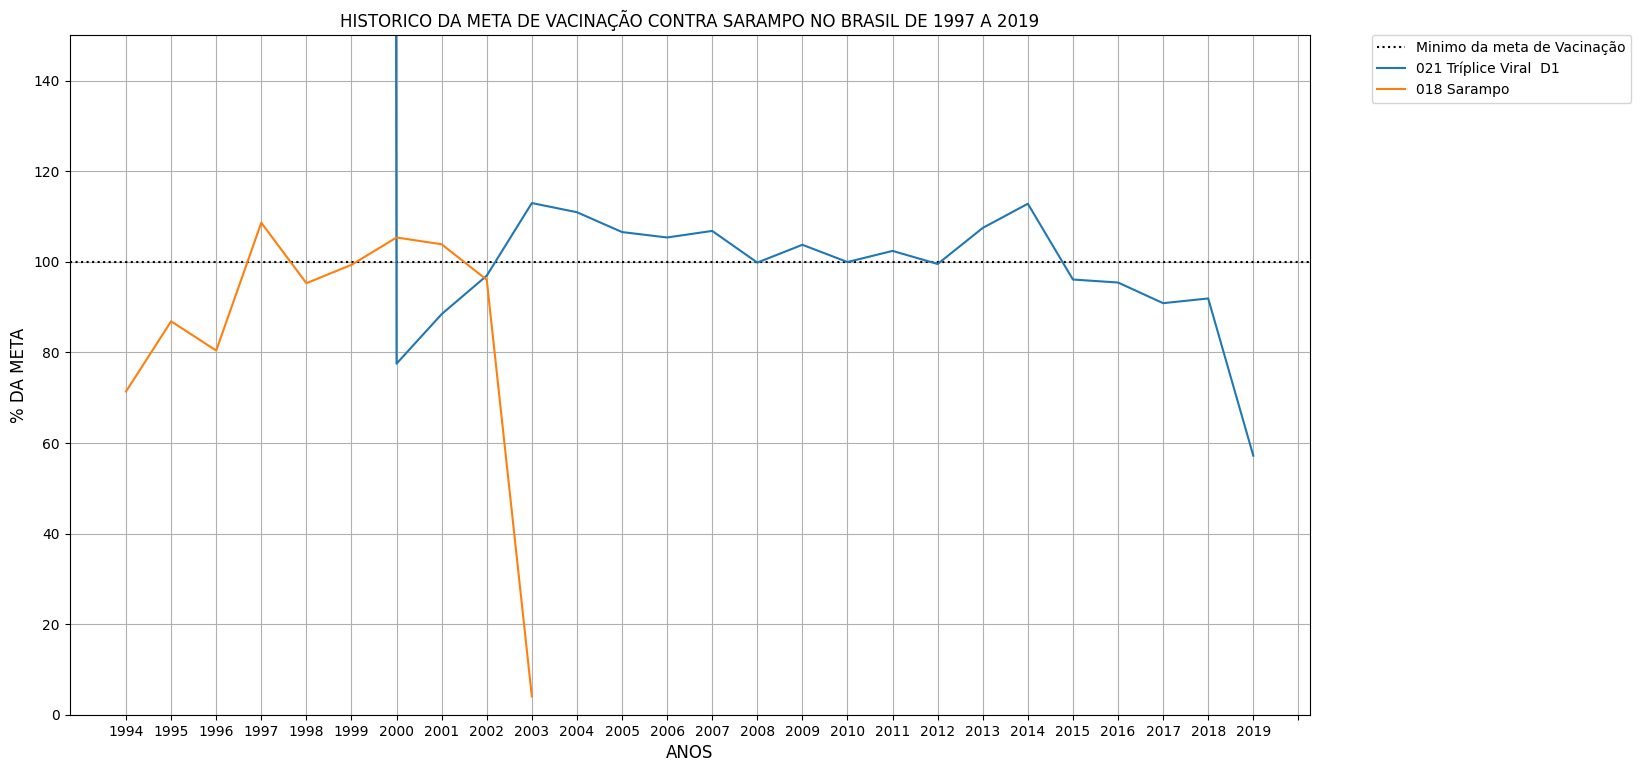

In [22]:
#Plogem do grafico somente para as vacinas de Sarampo e Triplice viral 
%matplotlib inline

plt.figure(figsize=(16,9), dpi=100)

plt.xticks(ticks=np.arange(0,50), fontsize=10)


plt.title('HISTORICO DA META DE VACINAÇÃO CONTRA SARAMPO NO BRASIL DE 1997 A 2019')  
plt.xlabel('ANOS',fontsize=12)
plt.ylabel('% DA META', fontsize=12)
plt.grid()
plt.axhline(y=100.0, color="black", linestyle=":")
plt.ylim(0,150)

plt.plot(raw_imunos_ano.T[['021 Tríplice Viral  D1','018 Sarampo']])

plt.legend(['Minimo da meta de Vacinação','021 Tríplice Viral  D1','018 Sarampo'],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

Ao isolar os imunos para o Sarampo temos um cenário mais próximo as informações do grafico da OMS.

Notar que em 2003 a vacina de Sarampo foi incorporada a Tríplice Viral em definitivo, explicando o declínio da aplicação de Sarampo e a continuidade da Tríplice viral.

Em 2000 temos um número muito alto (em torno de 6700% da meta) do atingimento da meta pela tríplice viral, algo não aplicável, logo este valor e considerado como erro de preenchimento do valor na fonte e será ignorado nas análises futuras.


In [23]:
#Importação da base raw_sarampo_estados_ano
url2 = 'https://raw.githubusercontent.com/PDamaral/Projects/main/Vacina%C3%A7%C3%A3o_ate_2019_BR/sarampo_estado_ano.csv'
raw_sarampo_estados_ano = pd.read_csv(url2,encoding= 'ISO-8859-1', skiprows = 4, sep=';', skipfooter = 20, na_values=('...','-'),index_col='Unidade da Federação', decimal=',')
raw_sarampo_estados_ano.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,75.57,96.54,82.64,105.09,103.70,97.87,59.03,98.62,95.55,61.38,130.63,115.99,125.36,116.70,103.49,102.29,100.41,102.72,105.40,106.52,146.88,109.00,109.79,105.52,102.03,56.62,96.22
12 Acre,37.05,98.03,54.94,93.04,68.15,74.42,60.88,82.16,91.94,49.48,123.22,95.12,90.84,109.45,94.17,103.45,96.87,105.29,90.28,95.00,99.20,84.21,75.71,79.76,82.94,52.58,83.08


In [24]:
#Tratamento da base removendo os anos 1994,1995 e 1996 por terem valores não preenchidos e pouco impacto na analise
#Removendo a coluna Total
sarampo_estados_ano = raw_sarampo_estados_ano.drop(columns=['1994','1995','1996','Total'])
sarampo_estados_ano = sarampo_estados_ano.transpose() 
sarampo_estados_ano.head(2)

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
1997,105.09,93.04,106.45,110.31,95.61,92.11,122.72,102.07,76.72,131.76,95.16,94.59,122.51,65.19,106.09,86.02,108.07,105.21,105.80,134.43,122.89,107.62,97.15,83.04,103.39,113.82,0.42
1998,103.70,68.15,72.42,89.50,61.00,80.61,100.32,87.08,86.29,90.77,74.91,83.12,113.48,61.49,96.44,86.40,82.96,107.62,103.65,124.72,113.72,92.18,84.22,90.18,95.64,86.15,1.30


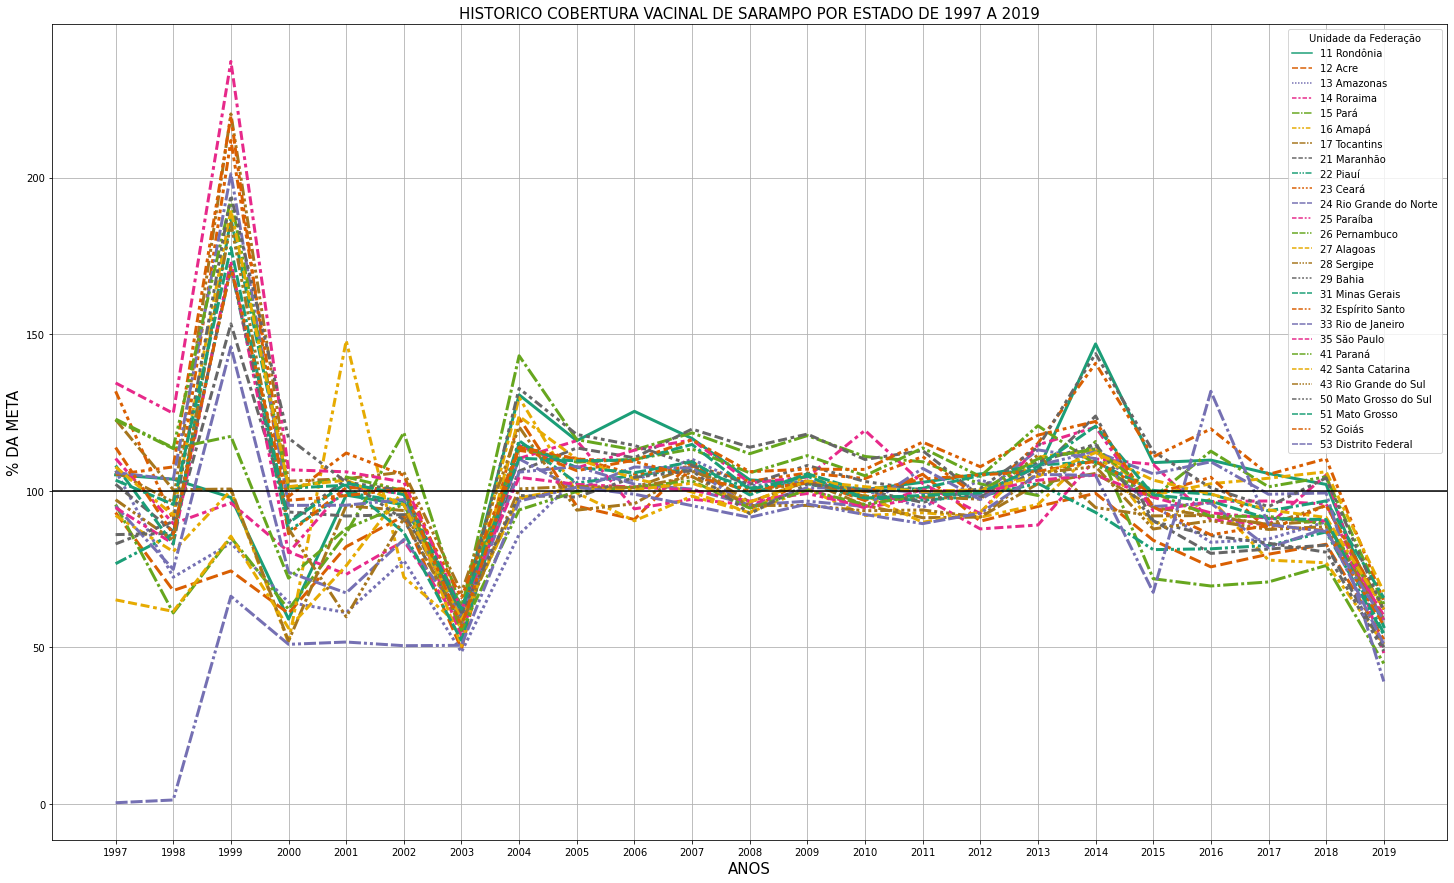

In [25]:
#Plotagem da cobertura de vacinação de sarampo por estado 
plt.figure(figsize=(25, 15))
sns.lineplot(data=sarampo_estados_ano, markers= False, palette="Dark2", linewidth=3)

plt.title('HISTORICO COBERTURA VACINAL DE SARAMPO POR ESTADO DE 1997 A 2019',fontsize=15)  
plt.xlabel('ANOS',fontsize=15)
plt.ylabel('% DA META', fontsize=15)
plt.grid()
plt.axhline(y=100.0, color="black", linestyle="-")
#plt.ylim(0,250)

plt.show()

Podemos observar no gráfico que as metas de vacinação contra o Sarampo foram atingidas ou muito próximas ao sucesso por diversos anos, porem de 2015 em diante temos uma dispersão maior quanto ao atingimento da meta.

Nota: em 2003 existe uma queda brusca na cobertura, mas esta queda se dá a natureza das informações da base, os dados são a média da aplicação da vacina de sarampo e da primeira dose da tríplice viral, em 2003 temos baixa incidência da vacina de sarampo pois a migração para a tríplice viral estava quase completa, isso se reflete no vale apresentado no gráfico, porem se trata de uma distorção pontual dos dados.




De acordo com relatório da fundação [Fiocruz](https://www.bio.fiocruz.br/index.php/br/noticias/1828-brasil-teve-3-629-casos-confirmados-de-sarampo) o boletim epidemiológico das semanas entre 29 de dezembro de 2019 a 23 de maio de 2020, apontam um surto de Sarampo no Brasil com 3.629 casos confirmados em laboratório e 5 estados apresentam 96% dos casos, sendo eles: Pará, Rio de Janeiro, São Paulo, Paraná e Santa Catarina.

Vamos estudar a cobertura vacinal destes estados e comparar com estados próximos geograficamente onde não houveram indicações de surtos.



In [26]:
#Separação dos estados com indicação de surto de sarampo
estados_surto_2019 = sarampo_estados_ano[['15 Pará','33 Rio de Janeiro', '35 São Paulo','41 Paraná','42 Santa Catarina','17 Tocantins' , '32 Espírito Santo', '50 Mato Grosso do Sul']]
estados_surto_2019.head(2)

Unidade da Federação,15 Pará,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,17 Tocantins,32 Espírito Santo,50 Mato Grosso do Sul
1997,95.61,105.80,134.43,122.89,107.62,122.72,105.21,83.04
1998,61.00,103.65,124.72,113.72,92.18,100.32,107.62,90.18


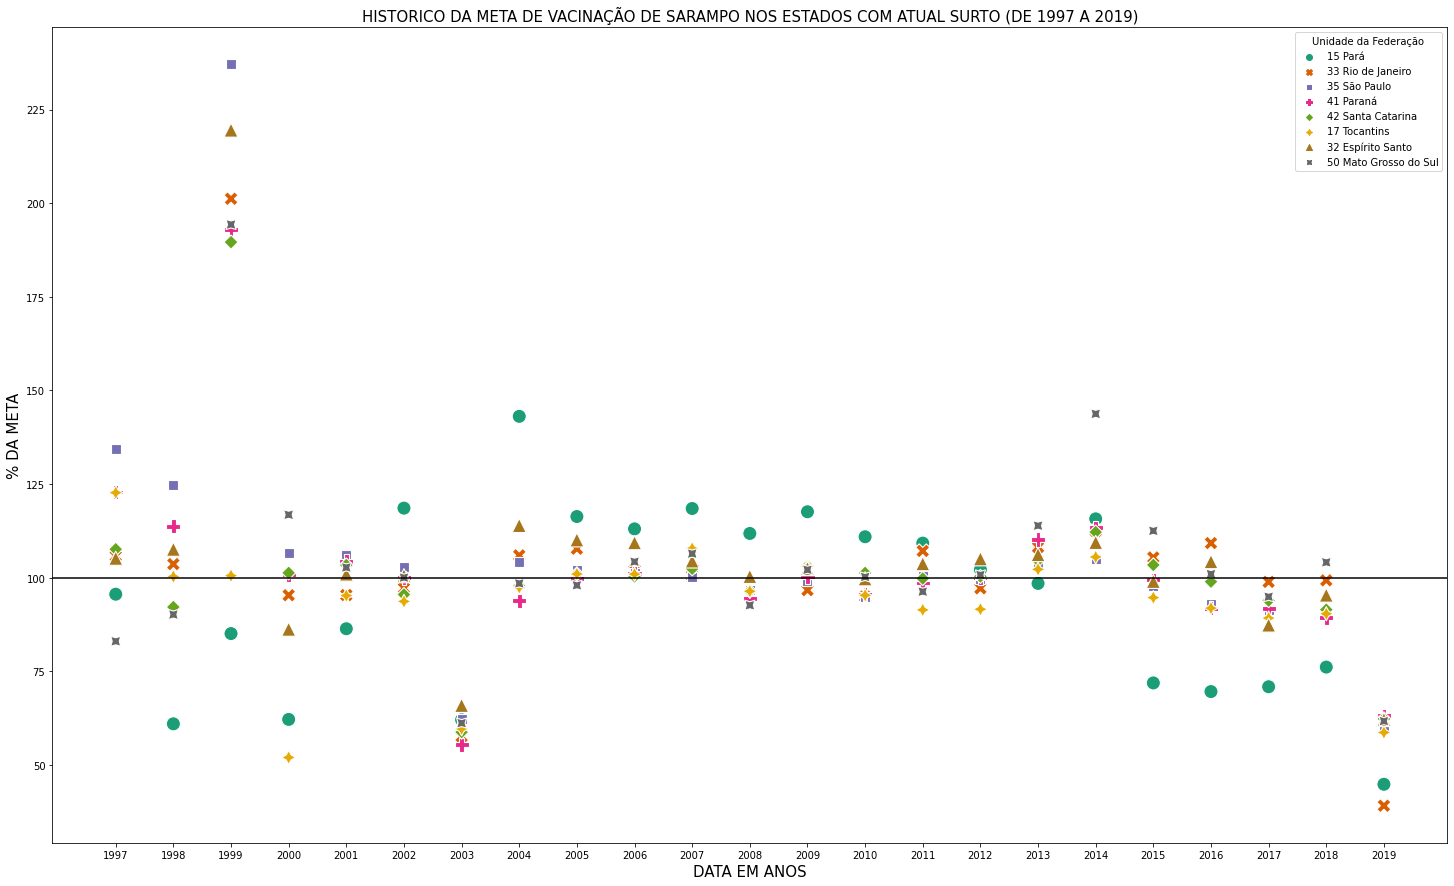

In [27]:
#Plotagem de gráfico para melhor visualização se atingiu ou não a meta, por estado
plt.figure(figsize=(25, 15))
sns.scatterplot(data=estados_surto_2019, palette="Dark2", s=200)

plt.title('HISTORICO DA META DE VACINAÇÃO DE SARAMPO NOS ESTADOS COM ATUAL SURTO (DE 1997 A 2019)',fontsize=15)  
plt.xlabel('DATA EM ANOS',fontsize=15)
plt.ylabel('% DA META', fontsize=15)
#plt.grid()
plt.axhline(y=100.0, color="black", linestyle="-")

plt.show()

###Grafico da cobertura vacinal por estado com alerta de surto

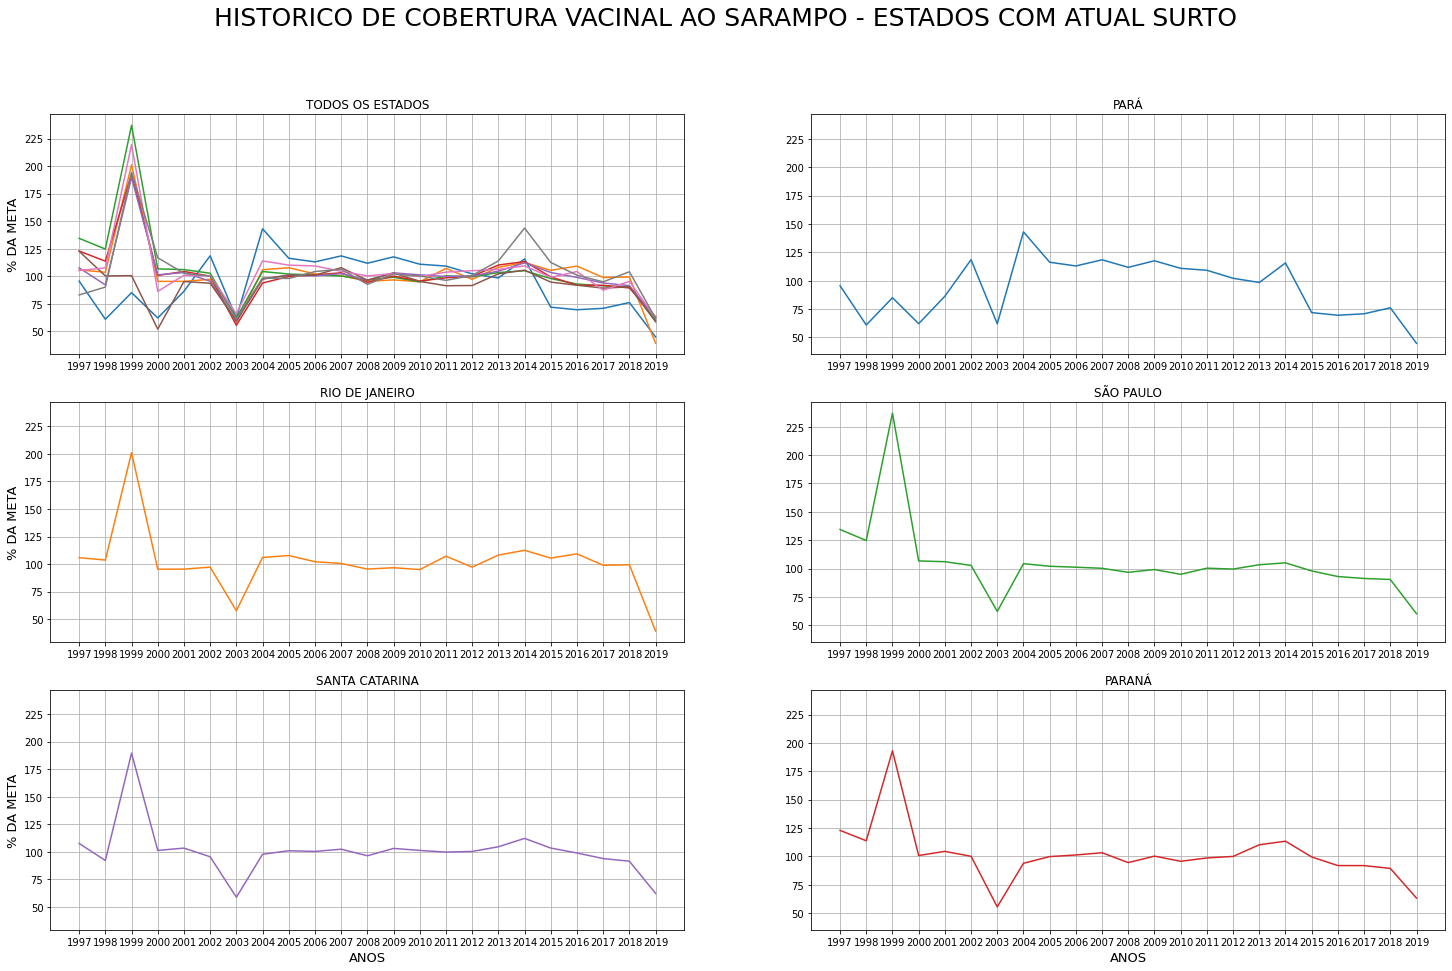

In [28]:
#Plotagem do grafico por estado da cobertura vacinal ao Sarampo
fig, axs = plt.subplots(3, 2,figsize=(25,15),sharey='col',linewidth='4')

axs[0, 0].plot(estados_surto_2019.index, estados_surto_2019)
axs[0, 0].set_title('TODOS OS ESTADOS',fontsize=12)
axs[0, 0].set_ylabel('% DA META',fontsize=13)
axs[0, 0].grid(which='both')

axs[0, 1].plot(estados_surto_2019.index, estados_surto_2019['15 Pará'], 'tab:blue')
axs[0, 1].set_title('PARÁ',fontsize=12)
axs[0, 1].grid(which='both')

axs[1, 0].plot(estados_surto_2019.index, estados_surto_2019['33 Rio de Janeiro'], 'tab:orange')
axs[1, 0].set_title('RIO DE JANEIRO',fontsize=12)
axs[1, 0].grid(which='both')
axs[1, 0].set_ylabel('% DA META',fontsize=13)

axs[1, 1].plot(estados_surto_2019.index, estados_surto_2019['35 São Paulo'], 'tab:green')
axs[1, 1].set_title('SÃO PAULO',fontsize=12)
axs[1, 1].grid(which='both')

axs[2, 1].plot(estados_surto_2019.index, estados_surto_2019['41 Paraná'], 'tab:red')
axs[2, 1].set_title('PARANÁ',fontsize=12)
axs[2, 1].grid(which='both')
axs[2, 1].set_xlabel('ANOS',fontsize=13)


axs[2, 0].plot(estados_surto_2019.index, estados_surto_2019['42 Santa Catarina'], 'tab:purple')
axs[2, 0].set_title('SANTA CATARINA',fontsize=12)
axs[2, 0].grid(which='both')
axs[2, 0].set_ylabel('% DA META',fontsize=13)
axs[2, 0].set_xlabel('ANOS',fontsize=13)

plt.suptitle('HISTORICO DE COBERTURA VACINAL AO SARAMPO - ESTADOS COM ATUAL SURTO', fontsize=25)

plt.show()

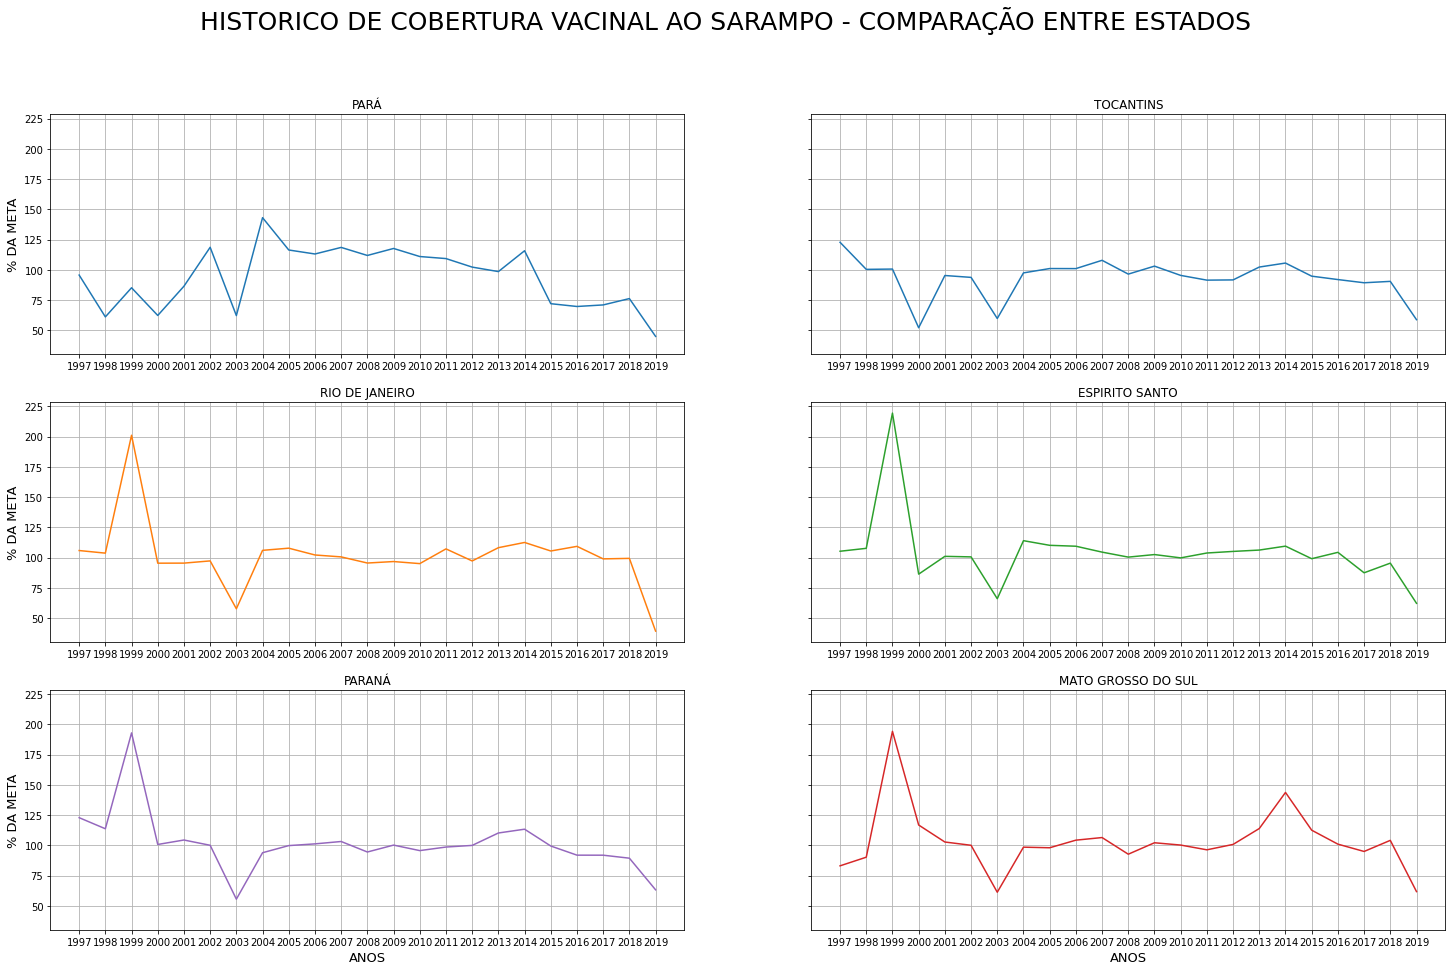

In [29]:
#PLotagem da cobertura vacinal comparando estados com surto(a esquerda) com estados sem surto(a direita)
fig, axs = plt.subplots(3, 2,figsize=(25,15),sharey='all',linewidth='4')

axs[0, 0].plot(estados_surto_2019.index, estados_surto_2019['15 Pará'],'tab:blue')
axs[0, 0].set_title('PARÁ',fontsize=12)
axs[0, 0].set_ylabel('% DA META',fontsize=13)
axs[0, 0].grid(which='both')

axs[0, 1].plot(estados_surto_2019.index, estados_surto_2019['17 Tocantins'], 'tab:blue')
axs[0, 1].set_title('TOCANTINS',fontsize=12)
axs[0, 1].grid(which='both')

axs[1, 0].plot(estados_surto_2019.index, estados_surto_2019['33 Rio de Janeiro'], 'tab:orange')
axs[1, 0].set_title('RIO DE JANEIRO',fontsize=12)
axs[1, 0].grid(which='both')
axs[1, 0].set_ylabel('% DA META',fontsize=13)

axs[1, 1].plot(estados_surto_2019.index, estados_surto_2019['32 Espírito Santo'], 'tab:green')
axs[1, 1].set_title('ESPIRITO SANTO',fontsize=12)
axs[1, 1].grid(which='both')

axs[2, 0].plot(estados_surto_2019.index, estados_surto_2019['41 Paraná'], 'tab:purple')
axs[2, 0].set_title('PARANÁ',fontsize=12)
axs[2, 0].grid(which='both')
axs[2, 0].set_ylabel('% DA META',fontsize=13)
axs[2, 0].set_xlabel('ANOS',fontsize=13)

axs[2, 1].plot(estados_surto_2019.index, estados_surto_2019['50 Mato Grosso do Sul'], 'tab:red')
axs[2, 1].set_title('MATO GROSSO DO SUL',fontsize=12)
axs[2, 1].grid(which='both')
axs[2, 1].set_xlabel('ANOS',fontsize=13)



plt.suptitle('HISTORICO DE COBERTURA VACINAL AO SARAMPO - COMPARAÇÃO ENTRE ESTADOS', fontsize=25)

plt.show()

#**Conclusão**

Ao analisarmos os dados da OMS, podemos observar que o Brasil possui um bom histórico de cobertura vacinal com despesas próximas ao da Argentina, que já não se sai tão bem no atingimento das metas, o governo da Bolivia aplica pouco recurso per capita a vacinação e possui números bem ruins quanto a sua cobertura.

Os dados comparativos entre o Programa de Imunização Nacional e os dados da OMS divergem em muito seus resultados, visto que houve o controle de algumas doenças que são cobertas pelas vacinas tendo a acreditar em um cenário positivo quanto ao histórico de vacinação no Brasil, e que temos mais dificuldades em documentar o trabalho do que realiza-lo de fato, porem existe um fato em ambas as bases, que nos últimos anos o índice de cobertura esta diminuindo, o que e um fato alarmante e o reflexo disso já aparece como o surto de sarampo, outras doenças podem voltar a aparecer. 
Agradeço novamente a toda equipe [Alura](https://www.alura.com.br/)
 e aos colegas do bootcamp, pela orientação e ajuda no desenvolvimento deste estudo.
Dezembro/2020

Paulo Amaral.

www.linkedin.com/in/paulodshamaral


